In [1]:
library(tidyverse)
library(magrittr)
plotsize = function (x,y) options(repr.plot.width=x, repr.plot.height=y)
plotsize(8,3)

Warning message:
: package ‘tidyverse’ was built under R version 3.2.5Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
: package ‘ggplot2’ was built under R version 3.2.5Warning message:
: package ‘tibble’ was built under R version 3.2.5Warning message:
: package ‘tidyr’ was built under R version 3.2.5Warning message:
: package ‘readr’ was built under R version 3.2.5Warning message:
: package ‘purrr’ was built under R version 3.2.5Warning message:
: package ‘dplyr’ was built under R version 3.2.5Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
true_theta = 1
true_sigma2 = 1
N = 100
gen_data = function(true_theta, true_sigma2=1, N=100) {
    X = runif(N, -1,1)
    Y = rnorm(N, true_theta*X, true_sigma2)
    return(data.frame(X=X,Y=Y))
}

# Our MLE Estimator for $\theta$ if we know $\sigma^2=1$

### $\hat\theta = \frac{\sum x_i y_i}{\sum x_i^2}$

In [3]:
estimate_xy = function(X,Y) {
    return(sum(X*Y)/sum(X^2))
}
estimate = function(data) data %$% estimate_xy(X,Y)

# The true sampling distribution, calculated empirically

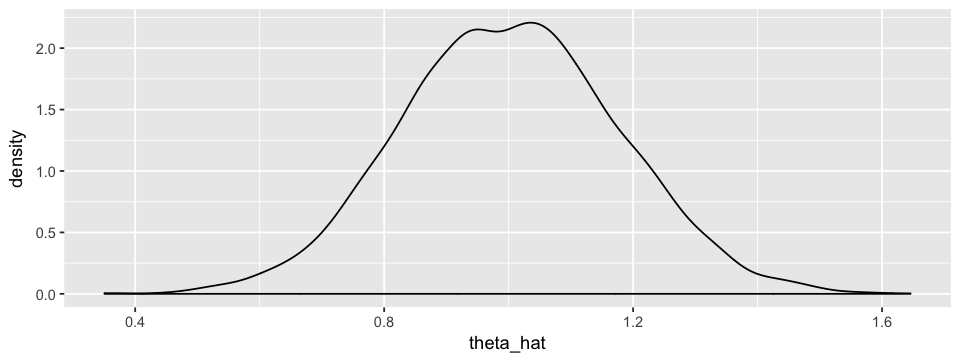

In [4]:
theta_hat = 1:5000 %>% # 5000 times
map(~gen_data(true_theta, true_sigma2)) %>% # resample from the true data generating process ("real world")
map_dbl(~estimate(.)) # estimate
qplot(x=theta_hat, geom='density')

# Our observed data and MLE estimate for $\hat\theta$

In [6]:
data = gen_data(true_theta, true_sigma2)
theta_hat_mle = estimate(data)

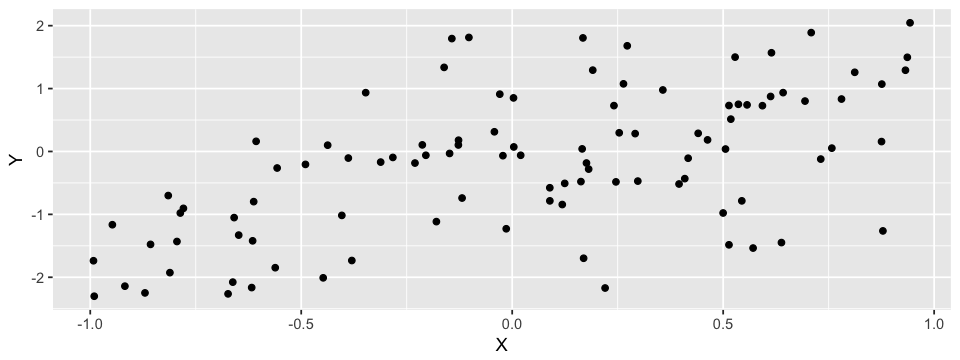

In [7]:
data %$% qplot(X,Y)

In [8]:
theta_hat_mle

[1] 1.192504

# Analytical estimate of sampling distribution of $\hat\theta$

## $\hat\theta \sim \mathcal{N} \left( \hat\theta, \frac{1}{\sqrt(\sum x_i^2)}  \right)$

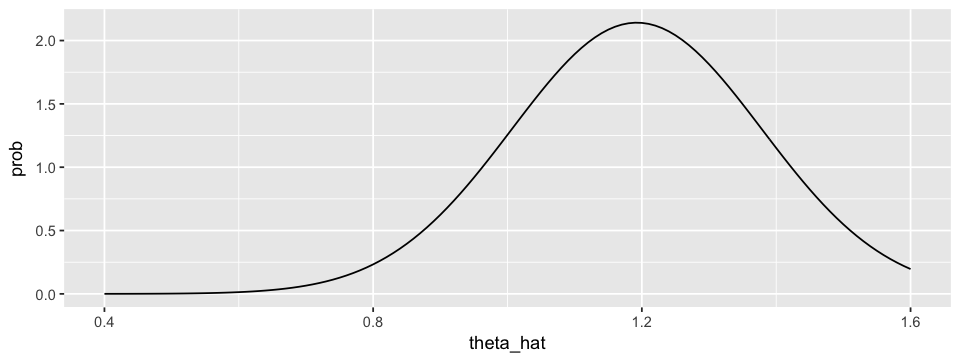

In [9]:
theta_hat = seq(0.4,1.6,0.01)
prob = theta_hat %>% map_dbl(~dnorm(., theta_hat_mle, sqrt(1/sum(data$X^2))))
qplot(x=theta_hat, y=prob, geom='line')
# theta_hat = rnorm(1000, theta_hat_mle, sqrt(1/sum(data$X^2)))
# qplot(theta_hat, geom='density')

# Parametric bootstrap estimate of sampling distribution

In [10]:
parametric_bootstrap_sample = function(data, theta_hat_mle) {
    data %>% 
    sample_n(size=N, replace=T) %>% # randomly sample N values of X from the data
    mutate(Y = rnorm(N, theta_hat_mle*X, true_sigma2)) # sample Y from our estimated model, given sample of X
}

Warning message:
: package ‘bindrcpp’ was built under R version 3.2.5

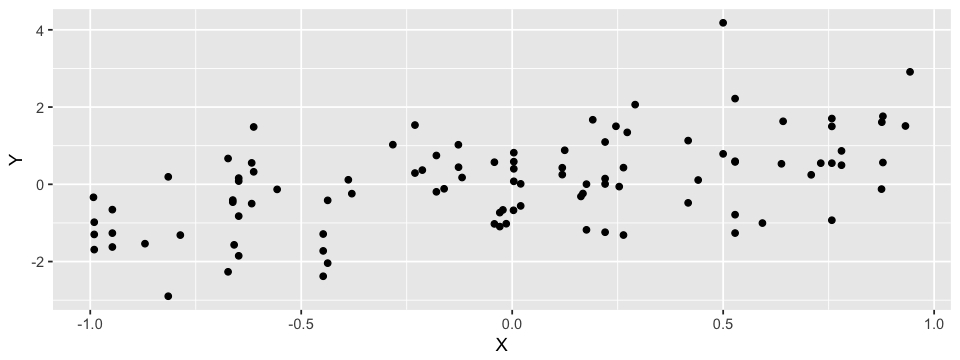

In [11]:
data %>% parametric_bootstrap_sample(theta_hat_mle) %$% qplot(X,Y)

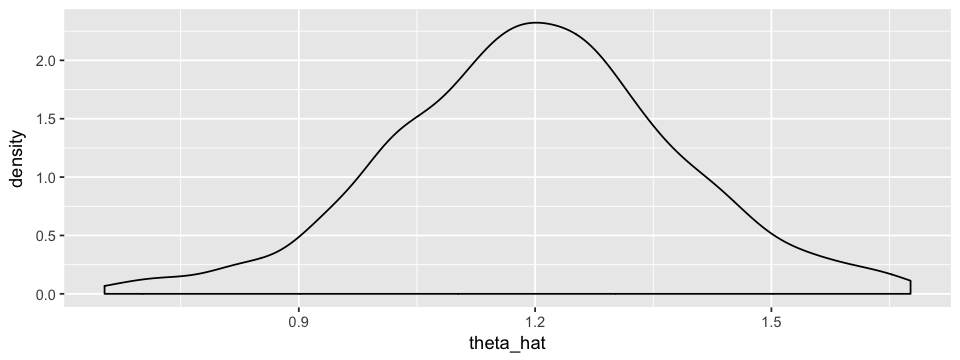

In [12]:
theta_hat = 1:1000 %>%
    map(~parametric_bootstrap_sample(data, theta_hat_mle)) %>% # generate parametric bootstrap samples
    map_dbl(~estimate(.))    # estimate on each of them
qplot(theta_hat, geom='density')

# (Nonparametric) bootstrap estimate of sampling distribution

In [13]:
bootstrap_sample = function(data) {
    data %>% 
    sample_n(size=N, replace=T) # sample N random rows from the data
}

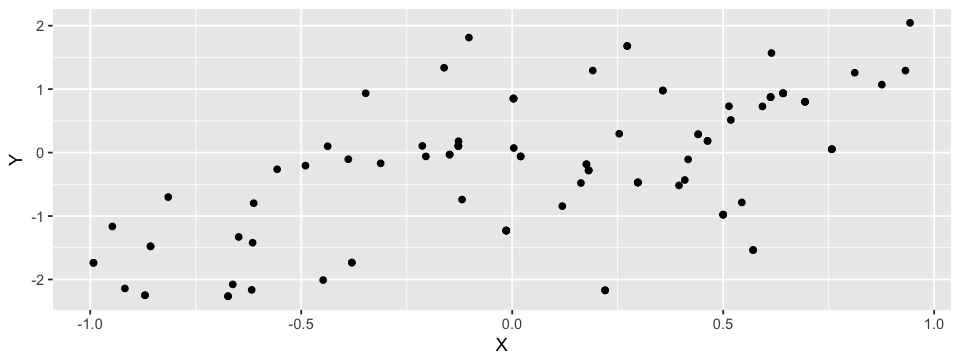

In [14]:
data %>% bootstrap_sample %$% qplot(X,Y)

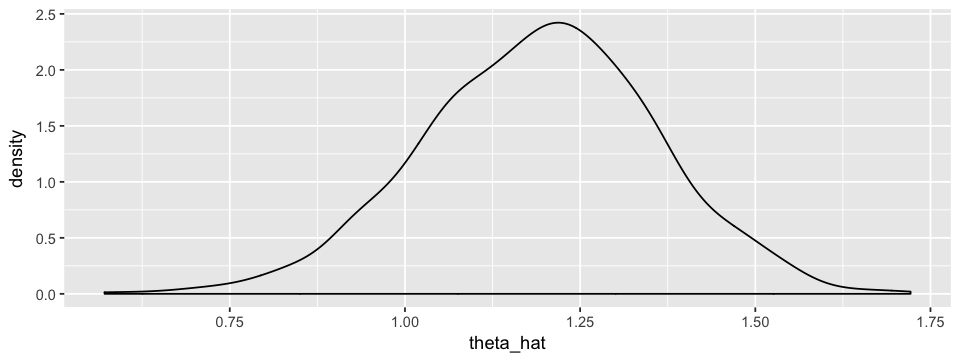

In [15]:
theta_hat = 1:1000 %>%
    map(~bootstrap_sample(data)) %>% # generate bootstrap samples
    map_dbl(~estimate(.)) # estimate
qplot(theta_hat, geom='density')